# **Hunter Hunter Text Mining** ⛏

Hello Hunters! I want to invite you to a short journey to one of the most popular manga series of all time: **Hunter x Hunter**. Today we'll look at the english subtitles of this serie and with text mining methods find out in the shortest possible form what are the characters with most apparitions, what is the sentiment attached to them, what phrases are most used and much more.

This text mining relies on other work on popular movies, here are the **Kaggle resources** I highly recommend:

* https://www.kaggle.com/code/michau96/harry-potter-and-the-text-mining/notebook
* https://www.kaggle.com/datasets/bkoozy/hunter-x-hunter-subtitles
* https://www.kaggle.com/code/rtatman/tutorial-getting-n-grams/notebook


But we're back because the boat for Hunter Exam is already departing! If you have not watched the full manga serie, be careful, the analysis may contain spoilers.

## **Introduction: Libraries and Dataset**

Before going into text mining, lets import the necessary python libraries and have a look to our dataset: the **subtitle files of 148 episodes of the TV anime series : "Hunter x Hunter (2011)" in English language**.

In [1]:
# import necessary libraries
import pandas as pd
import re
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
# read hunter hunter subtitles
with open('/content/drive/MyDrive/HunterxHunter Text Mining/dataset.txt') as f:
    subtitles = f.read().splitlines()

In [3]:
# number of subtitles
print(len(subtitles))

# first 5 subtitles
subtitles[0:5]

53838


['\ufeffFearsome monsters... Exotic creatures...',
 'Vast riches... Hidden treasures...',
 'Evil enclaves... Unexplored lands...',
 'The word "unknown" holds magic.',
 'And some incredible people are']

In [4]:
# clean text

# Clean the text

# Create a function to clean the tweets

def cleanTxt(text):
  # text = text[0].lower() + text[1:] # make first word lowercase
  text = " " + text + " " # add spaces
  text = re.sub('\[.*?\]', '', text) # removing text within brackets
  text = re.sub('\(.*?\)', '', text) # removing text within parentheses
  text = re.sub('\w*\d\w*', '', text) # removing numbers
  text = re.sub('\s+', ' ', text) # if there's more than 1 whitespace, then make it just 1
  text = re.sub('\n', ' ', text) # if there's a new line, then make it a whitespace
  text = re.sub('\"+', '', text) # removing any quotes
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Get rid of all punctuation
  text = re.sub(r'[^\w\s]', '',text) # remove other punctuation

  return text

# Cleaning the text
subtitles_clean = [cleanTxt(x) for x in subtitles]

# Show the cleaned text
subtitles_clean[0:5]

[' Fearsome monsters Exotic creatures ',
 ' Vast riches Hidden treasures ',
 ' Evil enclaves Unexplored lands ',
 ' The word unknown holds magic ',
 ' And some incredible people are ']

In [5]:
# number of words
number_words = [len(str(x).split()) for x in subtitles_clean]
print(number_words[0:5])

# total number of words
print(sum(number_words))

[4, 4, 4, 5, 5]
256003


In [6]:
# number of characters
number_charac = [len(str(x)) for x in subtitles_clean]
print(number_charac[0:5])

# total number of characters
print(sum(number_charac))

[36, 30, 32, 30, 32]
1390334


## **What are the characters with most apparitions?**

To view the apparence of each character, we need to manually set the main character names from the serie. We can see the **main characters of Hunter x Hunter** on its dedicated Wikipedia page: 

https://en.wikipedia.org/wiki/List_of_Hunter_%C3%97_Hunter_characters#Phantom_Troupe

In [7]:
# list of hunter hunter characters
characters = [' Gon ',' Killua ',' Leorio ',' Kurapika ',' Hisoka ',' Lucilfer ',' Meruem ',' Feitan ', ' Genthru ',
              ' Nobunaga ',' Illumi ',' Kalluto ',' Pitou ',' Pouf ',' Youpi ',' Meleoron ',' Ging ',' Netero ',
              ' Tonpa ',' Shoot ',' Zeno ',' Razor ',' Biscuit ',' Knuckle ',' Mito ',' Komugi ', ' Alluka ']

In [8]:
# subtitles by character
subtitles_filts = []
for y in characters:
  subtitles_filt = []
  for x in subtitles_clean:
    if y in x:
      subtitles_filt.append(x)
  subtitles_filts.append(subtitles_filt)

In [9]:
# number of subtitles by character
number_sub = []
for i in subtitles_filts:
  number_sub.append(len(i))

print(number_sub)

[874, 516, 159, 193, 202, 5, 16, 12, 41, 32, 42, 5, 160, 84, 109, 40, 137, 39, 15, 87, 10, 32, 9, 121, 4, 44, 83]


In [10]:
# create dataframe
characters_subs = pd.DataFrame(
    {'character': characters,
     'nb of subtitles': number_sub
    })
characters_subs = characters_subs.sort_values(by='nb of subtitles', ascending=False)

In [11]:
# create arcs list 
arcs = []
for x in subtitles_clean:
  if subtitles_clean.index(x) <= 9369:
    arcs.append("1.Hunter Exam")
  elif 9369 < subtitles_clean.index(x) <= 14186:
    arcs.append("2.Heavens Arena")
  elif 14186 < subtitles_clean.index(x) <= 22884:
    arcs.append("3.Phantom Troupe")
  elif 22884 < subtitles_clean.index(x) <= 31005:
    arcs.append("4.Greed Island")
  elif 31005 < subtitles_clean.index(x) <= 49637:
    arcs.append("5.Chimera Ant")
  else:
    arcs.append("6.Election arc")

In [12]:
# create dataframe
subsnarcs = pd.DataFrame(
    {'subtitles': subtitles_clean,
     'arcs': arcs
    })

In [13]:
# add characters
subsnarcs['characters'] = 'no character'
for x in characters:
  for i in range(0,subsnarcs['subtitles'].shape[0]):
    if x in subsnarcs['subtitles'][i]:
      subsnarcs['characters'][i] = x

In [14]:
# display dataframe
subsnarcs.head()

,subtitles,arcs,characters
0,Fearsome monsters Exotic creatures,1.Hunter Exam,no character
1,Vast riches Hidden treasures,1.Hunter Exam,no character
2,Evil enclaves Unexplored lands,1.Hunter Exam,no character
3,The word unknown holds magic,1.Hunter Exam,no character
4,And some incredible people are,1.Hunter Exam,no character


In [15]:
# number of subtitles by character
nbsubs = subsnarcs[['arcs','characters']].value_counts(normalize=True).reset_index()
nbsubs = nbsubs.rename(columns={0:'subs_share'})
nbsubs = nbsubs[nbsubs['characters'] != "no character"].reset_index().iloc[:,1:]
nbsubs = nbsubs.sort_values(by=['arcs','subs_share'], ascending=[True,False])
nbsubs

,arcs,characters,subs_share
0,1.Hunter Exam,Gon,0.005331
2,1.Hunter Exam,Killua,0.003028
8,1.Hunter Exam,Leorio,0.001709
12,1.Hunter Exam,Kurapika,0.001505
13,1.Hunter Exam,Hisoka,0.001449
...,...,...,...
48,6.Election arc,Pitou,0.000093
52,6.Election arc,Hisoka,0.000074
55,6.Election arc,Shoot,0.000037
60,6.Election arc,Zeno,0.000019


In [16]:
# plot top 10 characters
import plotly.express as px
df = px.data.tips()
fig = px.bar(nbsubs, x="subs_share", y="characters", color='arcs', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             orientation='h',
             height=600,
             title='Top 10 Characters with the most Sentences by Arc')
fig.update_layout(barmode='stack', yaxis={'range':[11.5,26.5],'categoryorder':'total ascending'})
fig.show()

## **What are the most used words?**

First we have to **remove the non-relevant words** such as "I", "am", etc. We call them stopwords and hopefully we have some libraries that provide already settled lexicon for removing these stopwords. We will combine the **nltk, gensim and sklearn libraries** here to remove the non-relevant words from our subtitles.

**Useful resource:** https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

In [17]:
# import stopwords libraries
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords

# import stopwords
sw_nltk = stopwords.words('english')
STOPWORDS = [x for x in STOPWORDS]
ENGLISH_STOP_WORDS = [x for x in ENGLISH_STOP_WORDS]

# set final stopwords list
STOPWORDS.extend(ENGLISH_STOP_WORDS)
STOPWORDS.extend(sw_nltk)
STOPWORDS.extend(['dont', 'thats', 'hes', 'didnt','theres','theyre','youre','isnt','wont','whats','huh', 'I', 'In', 'What', 'You', 'Dont',
                  'The', 'No', 'Of', 'Whats', 'Its','na','Your','That','Then',
                  'doesnt','youll','okay','hey','oh','im','x','Im','Thats','Hes','Ive','Theres','Youre','Yes','Yeah','let','Huh','Oh'])

# remove stopwords from list
allWords = ' '.join( [x for x in subtitles_clean])
tokens = word_tokenize(allWords)
tokens_without_sw = [word for word in tokens if not word in STOPWORDS]

# print len of tokens
print("Before removing Stopwords: ", len(tokens))
print("After removing Stopwords: ", len(tokens_without_sw))

Before removing Stopwords:  256257
After removing Stopwords:  120483


Once it's done we can see the most used words in a **WordCloud format**. Can you recognize the image shape? 

**Useful resources:** https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32

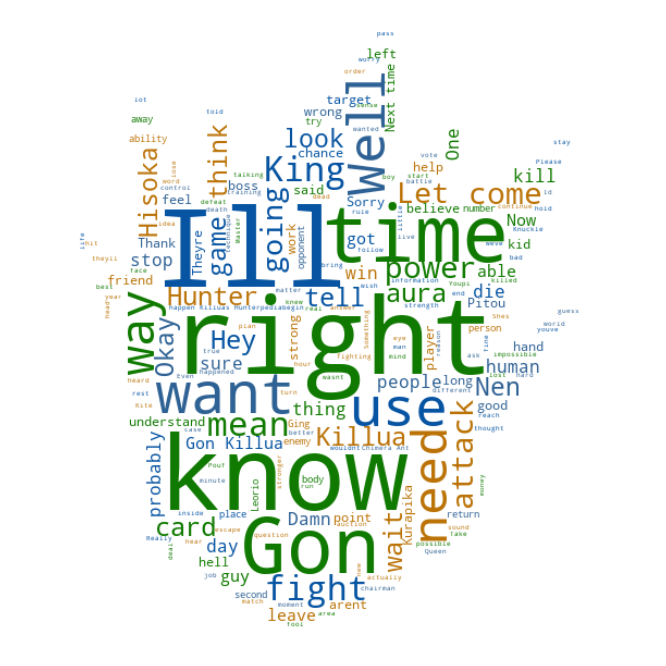

In [18]:
# wordcloud
def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[112, 100, 24],
              [36, 93, 38],
              [210, 93, 33],
              [210, 53, 38]]
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

allWords = ' '.join( [x for x in tokens_without_sw])
mask = np.array(Image.open('/content/drive/MyDrive/HunterxHunter Text Mining/HH.jpeg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=200, max_font_size=100,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=multi_color_func)
wc.generate(allWords)
plt.figure( figsize=(22,12) )
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# get words frequency
from nltk.probability import FreqDist

# transform subtitles column into list of tokens
for i in range(0,subsnarcs['subtitles'].shape[0]):
  tok = word_tokenize(str(subsnarcs['subtitles'][i]))
  subsnarcs['subtitles'][i] = [word for word in tok if not word in STOPWORDS]

# get the frequency of each word for each subtitle
subsnarcs['freq'] = ""
for i in range(0,subsnarcs['subtitles'].shape[0]):
  subsnarcs['freq'][i] = FreqDist(subsnarcs['subtitles'][i])

# show result
subsnarcs.head()

,subtitles,arcs,characters,freq
0,"[Fearsome, monsters, Exotic, creatures]",1.Hunter Exam,no character,"{'Fearsome': 1, 'monsters': 1, 'Exotic': 1, 'c..."
1,"[Vast, riches, Hidden, treasures]",1.Hunter Exam,no character,"{'Vast': 1, 'riches': 1, 'Hidden': 1, 'treasur..."
2,"[Evil, enclaves, Unexplored, lands]",1.Hunter Exam,no character,"{'Evil': 1, 'enclaves': 1, 'Unexplored': 1, 'l..."
3,"[word, unknown, holds, magic]",1.Hunter Exam,no character,"{'word': 1, 'unknown': 1, 'holds': 1, 'magic': 1}"
4,"[And, incredible, people]",1.Hunter Exam,no character,"{'And': 1, 'incredible': 1, 'people': 1}"


In [20]:
# format df
subtitle = []
word = []
count = []
for i in range(0,subsnarcs['subtitles'].shape[0]):
  subtitle.append(' '.join( [x for x in subsnarcs['subtitles'][i]]))
  word.append(list(subsnarcs['freq'][i].keys()))
  count.append(list(subsnarcs['freq'][i].values()))

In [21]:
# create dataframe
wsb = pd.DataFrame(
    {'subtitles': subtitle,
     'arcs': subsnarcs['arcs'],
     'characters': subsnarcs['characters'],
     'words': word,
     'count': count
    })
wsb = wsb.explode(['words','count'])
wsb.reset_index(inplace=True)
wsb = wsb.iloc[:,1:]

In [22]:
# remove spaces from characters list
characters = [x.replace(" ","") for x in characters]
characters[:5]

['Gon', 'Killua', 'Leorio', 'Kurapika', 'Hisoka']

In [23]:
# Words count by Arc
wsb_arcs = wsb.groupby(['arcs','words'])['count'].sum().reset_index()

# How many words do we have?
print(len(wsb_arcs['words'].unique()))

# set words to lowercase if it's not a character
for i in range(0,wsb_arcs['words'].shape[0]):
  if wsb_arcs['words'][i] in characters:
    wsb_arcs['words'][i] = wsb_arcs['words'][i][0].upper() + wsb_arcs['words'][i][1:]
  else: wsb_arcs['words'][i] = wsb_arcs['words'][i].lower()

# Remove irrelevant words
for i in range(0,wsb_arcs['words'].shape[0]):
  if wsb_arcs['words'][i] in STOPWORDS:
    wsb_arcs.drop(index=i,inplace=True)

# How many words do we have now?
print(len(wsb_arcs['words'].unique()))

11717
9825


In [24]:
# Words count by Character 
wsb_char = wsb.groupby(['characters','words'])['count'].sum().reset_index()

# How many words do we have?
print(len(wsb_char['words'].unique()))

# set words to lowercase if it's not a character
for i in range(0,wsb_char['words'].shape[0]):
  if wsb_char['words'][i] in characters:
    wsb_char['words'][i] = wsb_char['words'][i][0].upper() + wsb_char['words'][i][1:]
  else: wsb_char['words'][i] = wsb_char['words'][i].lower()

# Remove irrelevant words
for i in range(0,wsb_char['words'].shape[0]):
  if wsb_char['words'][i] in STOPWORDS:
    wsb_char.drop(index=i,inplace=True)

# How many words do we have now?
print(len(wsb_char['words'].unique()))

11717
9825


In [25]:
# Words count by Character (excluding no character)
wsb_char_exc = wsb[wsb['characters']!='no character']
wsb_char_exc = wsb_char_exc.groupby(['characters','words'])['count'].sum().reset_index()

# How many words do we have?
print(len(wsb_char_exc['words'].unique()))

# set words to lowercase if it's not a character
for i in range(0,wsb_char_exc['words'].shape[0]):
  if wsb_char_exc['words'][i] in characters:
    wsb_char_exc['words'][i] = wsb_char_exc['words'][i][0].upper() + wsb_char_exc['words'][i][1:]
  else: wsb_char_exc['words'][i] = wsb_char_exc['words'][i].lower()

# Remove irrelevant words
for i in range(0,wsb_char_exc['words'].shape[0]):
  if wsb_char_exc['words'][i] in STOPWORDS:
    wsb_char_exc.drop(index=i,inplace=True)

# How many words do we have now?
print(len(wsb_char_exc['words'].unique()))

1686
1509


In [26]:
# Top 20 Words by Arc
import plotly.express as px
fig = px.bar(wsb_arcs, x="count", y="words", color='arcs', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             orientation='h',
             height=700,
             title='Top 20 Words by Arc')
fig.update_layout(barmode='stack', yaxis={'range':[9804.5,9824.5],'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

In [27]:
# Top 20 Words by Character
fig = px.bar(wsb_char, x="count", y="words", color='characters', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             orientation='h',
             height=700,
             title='Top 20 Words by Character')
fig.update_layout(barmode='stack', yaxis={'range':[9804.5,9824.5],'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

In [28]:
# Top 20 Words by Character (Excluding no character)
fig = px.bar(wsb_char_exc, x="count", y="words", color='characters', 
             color_discrete_sequence=px.colors.qualitative.Vivid,
             orientation='h',
             height=700,
             title='Top 20 Words by Character Exc')
fig.update_layout(barmode='stack', yaxis={'range':[1488.5,1508.5],'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

## **What are the most used bigrams and trigrams?**

**Useful resource**:
https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [29]:
# create bigrams and trigrams
from nltk.collocations import BigramCollocationFinder
import collections
from nltk.util import ngrams
bigrams=ngrams(tokens_without_sw,2)
trigrams=ngrams(tokens_without_sw,3)

In [30]:
# get the frequency of each bigram in our corpus
esBigramFreq = collections.Counter(bigrams)

# what are the twelve most popular bigrams in the corpus?
esBigramFreq.most_common(20)

[(('Next', 'time'), 154),
 (('Gon', 'Killuas'), 132),
 (('Killuas', 'Hunterpedia'), 131),
 (('Hunter', 'Exam'), 77),
 (('Greed', 'Island'), 77),
 (('Gon', 'Killua'), 73),
 (('chain', 'user'), 71),
 (('Royal', 'Guard'), 70),
 (('Phantom', 'Troupe'), 69),
 (('Hunterpedia', 'Gon'), 66),
 (('Chimera', 'Ant'), 48),
 (('Chimera', 'Ants'), 46),
 (('We', 'need'), 45),
 (('Today', 'introduce'), 45),
 (('Which', 'means'), 42),
 (('use', 'Nen'), 42),
 (('Ill', 'kill'), 41),
 (('old', 'man'), 38),
 (('Yorknew', 'City'), 38),
 (('We', 'know'), 35)]

In [31]:
# get the frequency of each trigram in our corpus
esTrigramFreq = collections.Counter(trigrams)

# what are the twelve most popular trigrams in the corpus?
esTrigramFreq.most_common(20)

[(('Gon', 'Killuas', 'Hunterpedia'), 131),
 (('Killuas', 'Hunterpedia', 'Gon'), 66),
 (('Hunterpedia', 'Gon', 'Killuas'), 66),
 (('Coming', 'Gon', 'Killuas'), 32),
 (('Killuas', 'Hunterpedia', 'Today'), 32),
 (('Hunterpedia', 'Today', 'introduce'), 32),
 (('Brush', 'Teeth', 'Unripe'), 31),
 (('Teeth', 'Unripe', 'Fruit'), 31),
 (('First', 'comes', 'rock'), 28),
 (('Fearsome', 'monsters', 'Exotic'), 23),
 (('monsters', 'Exotic', 'creatures'), 23),
 (('Exotic', 'creatures', 'Vast'), 23),
 (('creatures', 'Vast', 'riches'), 23),
 (('Vast', 'riches', 'Hidden'), 23),
 (('riches', 'Hidden', 'treasures'), 23),
 (('Hidden', 'treasures', 'Evil'), 23),
 (('treasures', 'Evil', 'enclaves'), 23),
 (('Evil', 'enclaves', 'Unexplored'), 23),
 (('enclaves', 'Unexplored', 'lands'), 23),
 (('Unexplored', 'lands', 'word'), 23)]

In [32]:
%%capture
# create bigrams df
bigrams = pd.DataFrame({'bigrams': list(dict(esBigramFreq.most_common(20)).keys()), 
                         'count': list(dict(esBigramFreq.most_common(20)).values())})

bigrams['bigrams'] = bigrams['bigrams'].astype(str)

for i in range(0,bigrams['bigrams'].shape[0]):
  bigrams['bigrams'][i] = bigrams['bigrams'][i].replace('(','')
  bigrams['bigrams'][i] = bigrams['bigrams'][i].replace(')','')
  bigrams['bigrams'][i] = bigrams['bigrams'][i].replace(',','')
  bigrams['bigrams'][i] = bigrams['bigrams'][i].replace("'",'')

bigrams.head()

In [33]:
%%capture
# create trigrams df
trigrams = pd.DataFrame({'trigrams': list(dict(esTrigramFreq.most_common(20)).keys()), 
                         'count': list(dict(esTrigramFreq.most_common(20)).values())})

trigrams['trigrams'] = trigrams['trigrams'].astype(str)

for i in range(0,trigrams['trigrams'].shape[0]):
  trigrams['trigrams'][i] = trigrams['trigrams'][i].replace('(','')
  trigrams['trigrams'][i] = trigrams['trigrams'][i].replace(')','')
  trigrams['trigrams'][i] = trigrams['trigrams'][i].replace(',','')
  trigrams['trigrams'][i] = trigrams['trigrams'][i].replace("'",'')

trigrams.head()

In [34]:
# Top 20 Bigrams of the serie
fig = px.bar(bigrams, x="count", y="bigrams",
             color_discrete_sequence=px.colors.qualitative.Vivid,
             orientation='h',
             height=700,
             title='Top 20 Bigrams of the serie')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

In [35]:
# Top 20 Trigrams of the serie
fig = px.bar(trigrams, x="count", y="trigrams",
             color_discrete_sequence=px.colors.qualitative.Vivid,
             orientation='h',
             height=700,
             title='Top 20 Trigrams of the serie')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

## **What is the sentiment of popular words?**

In [36]:
# set main df
wsb_sen = wsb_arcs.groupby('words')['count'].sum().reset_index()

# set dfs by arcs and characters
wsb_sen_arcs = wsb_arcs.groupby(['arcs','words'])['count'].sum().reset_index()
wsb_sen_char = wsb_char.groupby(['characters','words'])['count'].sum().reset_index()

# display main df
wsb_sen.head()

,words,count
0,Alluka,83
1,Biscuit,9
2,Feitan,12
3,Genthru,41
4,Ging,140


In [37]:
# import VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [38]:
%%capture
# get VADER sentiment for each df
sentiment = wsb_sen['words'].apply(lambda x: analyzer.polarity_scores(str(x)))
wsb_sen = pd.concat([wsb_sen,sentiment.apply(pd.Series)],1).reset_index()

sentiment = wsb_sen_arcs['words'].apply(lambda x: analyzer.polarity_scores(str(x)))
wsb_sen_arcs = pd.concat([wsb_sen_arcs,sentiment.apply(pd.Series)],1).reset_index()

sentiment = wsb_sen_char['words'].apply(lambda x: analyzer.polarity_scores(str(x)))
wsb_sen_char = pd.concat([wsb_sen_char,sentiment.apply(pd.Series)],1).reset_index()

In [39]:
# Create a function to compute the VADER compound analysis
def getVaderAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

wsb_sen['sentiment'] = wsb_sen['compound'].apply(getVaderAnalysis)
wsb_sen_arcs['sentiment'] = wsb_sen_arcs['compound'].apply(getVaderAnalysis)
wsb_sen_char['sentiment'] = wsb_sen_char['compound'].apply(getVaderAnalysis)

# Show the dataframe
wsb_sen.head()

,index,words,count,neg,neu,pos,compound,sentiment
0,0,Alluka,83,0.0,1.0,0.0,0.0,Neutral
1,1,Biscuit,9,0.0,1.0,0.0,0.0,Neutral
2,2,Feitan,12,0.0,1.0,0.0,0.0,Neutral
3,3,Genthru,41,0.0,1.0,0.0,0.0,Neutral
4,4,Ging,140,0.0,1.0,0.0,0.0,Neutral


In [40]:
# remove characters
for i in range(0,wsb_sen['words'].shape[0]):
  if wsb_sen['words'][i] in characters:
    wsb_sen.drop(index=i,inplace=True)

for i in range(0,wsb_sen_arcs['words'].shape[0]):
  if wsb_sen_arcs['words'][i] in characters:
    wsb_sen_arcs.drop(index=i,inplace=True)

for i in range(0,wsb_sen_char['words'].shape[0]):
  if wsb_sen_char['words'][i] in characters:
    wsb_sen_char.drop(index=i,inplace=True)

In [41]:
# restrict dataframe to top 100
wsb_sen_100 = wsb_sen.sort_values('count',ascending=False).iloc[:100].reset_index()

In [42]:
# Top 20 Words with their sentiment
fig = px.bar(wsb_sen_100.sort_values('sentiment', ascending=False), x="count", y="words", color='sentiment', 
             color_discrete_sequence=[px.colors.qualitative.Vivid[5], px.colors.qualitative.Vivid[1],
             px.colors.qualitative.Vivid[9]],orientation='h',height=700,title='Top 20 Words by sentiment')
fig.update_layout(barmode='stack', yaxis={'range':[79.5,99.5],'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

We can see that most of the words are **neutral**. This shows that the series is a work **accessible to the general public**. Now let's remove neutral words to see what are the most positive and negative words.

In [43]:
# remove neutrals
for i in range(0,wsb_sen_100['sentiment'].shape[0]):
  if wsb_sen_100['sentiment'][i] == "Neutral":
    wsb_sen_100.drop(index=i,inplace=True)

In [44]:
# Top Words with their sentiment (without neutral)
fig = px.bar(wsb_sen_100.sort_values('sentiment', ascending=False), x="count", y="words", color='sentiment', 
             color_discrete_sequence=[px.colors.qualitative.Vivid[5],
             px.colors.qualitative.Vivid[9]],
             orientation='h',
             height=700,
             title='Top non-neutral Words by sentiment')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

In [45]:
# sentiment proportions
wsb_sen['sentiment'].value_counts(normalize=True)

Neutral     0.835375
Negative    0.093080
Positive    0.071545
Name: sentiment, dtype: float64

In [46]:
# Share of positive and negative sentiment by character

wsb_sen_char_plot = wsb_sen_char[wsb_sen_char['sentiment']!='Neutral'].groupby('characters')['sentiment'].value_counts(
                    normalize=True).reset_index(name='share').sort_values('sentiment', ascending=False)

fig = px.bar(wsb_sen_char_plot, x="share", y="characters", color='sentiment', 
             color_discrete_sequence=[px.colors.qualitative.Vivid[5],
             px.colors.qualitative.Vivid[9]],
             orientation='h',
             height=700,
             title='Share of sentiment by Character')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'},
                  title=dict(font=dict(size=18)))
fig.show()

In [47]:
# Share of positive and negative sentiment by character

wsb_sen_arcs_plot = wsb_sen_arcs[wsb_sen_arcs['sentiment']!='Neutral'].groupby('arcs')['sentiment'].value_counts(
                    normalize=True).reset_index(name='share').sort_values('sentiment', ascending=False)

fig = px.bar(wsb_sen_arcs_plot, x="share", y="arcs", color='sentiment', 
             color_discrete_sequence=[px.colors.qualitative.Vivid[5],
             px.colors.qualitative.Vivid[9]],
             orientation='h',
             height=700,
             title='Share of sentiment by Arc')
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'},
                  title=dict(font=dict(size=18)))
fig.show()